In [3]:
#Trivial example, e.g. for testing python 3
from __future__ import division
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
#assuming using py3 cobaya branch or merged
try:
    from cobaya.run import run
except ImportError:
    sys.path.insert(0,'../../cobaya')
    from cobaya.run import run
from random import random

In [6]:
from getdist.gaussian_mixtures import GaussianND
cov = np.array([[  5.57277600e-08,  -3.01958700e-07,   5.18704200e-08],
                [ -3.01958700e-07,   5.24242300e-06,  -5.20793300e-07],
                [  5.18704200e-08,  -5.20793300e-07,   2.30661100e-07]])
mean1 = [0.02, 0.1,0.05]
mixture=GaussianND(mean1, cov, names=['x','y','z'], labels=[r'x', 'y','z'], label='Model')
print np.sqrt(np.diagonal(cov))

[ 0.00023607  0.00228963  0.00048027]


In [7]:
info = {"params": 
        {"x":
             {"prior": {"min":  -1, "max":  1}, "ref":0.02, "proposal": 0.001, "latex": "\log_{10}f"},
         "y":
             {"prior": {"min": -1, "max": 1}, "ref":0.1, "proposal": 0.002, "latex": r"y"},
         "z":
             {"prior": {"min": -1, "max": 1}, "ref":0.05, "proposal": 0.005, "latex": r"z"}},        
         "sampler": 
            {"mcmc": {"max_samples": 2000, "max_tries": 1000, 'drag_nfast_times':None,
                      "check_every_dimension_times": 40, "learn_proposal": True}},
        "likelihood": 
         {
          "pdf": lambda x,y,z: np.log(mixture.pdf([x,y,z]))
         }}
       
#import cProfile
#cProfile.run('updated_info, products = run(info)', sort="cumtime")

In [8]:
updated_info, products = run(info)

[output] No output requested. Doing nothing (or returning in scripted call).
[mcmc] Initializing
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (was 2).
[mcmc] Sampling with covariance matrix:
[mcmc] array([[  4.00000000e-06,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e-06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.50000000e-05]])
[mcmc] Initial point:
    weight  minuslogpost    y     x     z  minuslogprior  chi2  chi2__pdf
0     1.0    -17.585858  0.1  0.02  0.05            0.0   0.0        0.0 
[mcmc] Sampling!


C:\Users\Antony Lewis\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


[mcmc] Finished burn-in phase: discarded 100 accepted steps.
[mcmc] Checkpoint: 120 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 240 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 360 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 480 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 600 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 720 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal pdf.
[mcmc] Checkpoint: 840 samples accepted.
[mcmc] Ready to learn a new proposal covmat
[mcmc] Updated covariance matrix of proposal

[mcsamples] *WARNING* outlier fraction 0.0305 


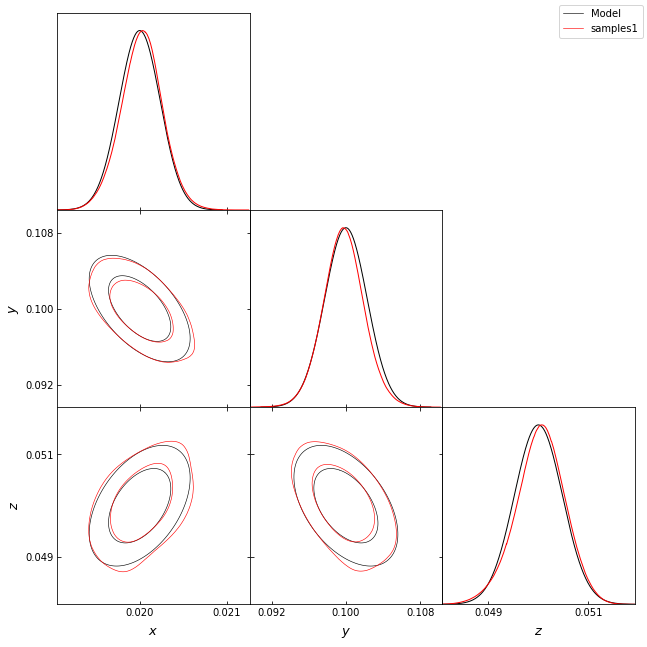

In [11]:
import getdist
import getdist.plots as gd
gdsamples = products["sample"].as_getdist_mcsamples(ignore_rows=0.3)
gdplot = gd.getSubplotPlotter(subplot_size=3)
gdplot.triangle_plot([mixture,gdsamples], ["x", "y","z"], filled=False)